<a href="https://colab.research.google.com/github/MohitNaren/ML/blob/main/Ml_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
mhassansaboor_uber_stocks_dataset_2025_path = kagglehub.dataset_download('mhassansaboor/uber-stocks-dataset-2025')
kunshbhatia_delhi_air_quality_dataset_path = kagglehub.dataset_download('kunshbhatia/delhi-air-quality-dataset')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kunshbhatia/delhi-air-quality-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/delhi-air-quality-dataset


In [ ]:
import pandas as pd
import os

# List all files in the dataset path
print("Files in dataset folder:", os.listdir(path))

# Load CSV file (adjust filename as needed)
df = pd.read_csv(os.path.join(path, "final_dataset.csv"))
df.head()
  # Replace with actual filename



Files in dataset folder: ['final_dataset.csv']


,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149


In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Check shape before feature selection
print("Original shape:", df.shape)

# Remove non-numeric columns for variance analysis
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Constant Features: Variance = 0
selector = VarianceThreshold(threshold=0.0)
selector.fit(df_numeric)
constant_features = df_numeric.columns[~selector.get_support()]
print("Constant features:", list(constant_features))

Original shape: (1461, 12)
Constant features: []


In [ ]:
selector_quasi = VarianceThreshold(threshold=0.01)
selector_quasi.fit(df_numeric)
quasi_constant_features = df_numeric.columns[~selector_quasi.get_support()]
print("Quasi-constant features:", list(quasi_constant_features))

Quasi-constant features: []


In [ ]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Set target
target_col = 'AQI'

# Drop non-numeric and non-feature columns
X = df.drop(columns=[target_col, 'Date'])  # Drop 'Date' (non-numeric) and target
X = X.select_dtypes(include=['int64', 'float64']).fillna(0)
y = df[target_col]

# Compute mutual information
mi_scores = mutual_info_regression(X, y)

# Format results
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mi_scores
}).sort_values(by='Mutual Information', ascending=False)

print(mi_df)



          Feature  Mutual Information
5            PM10            1.141376
4           PM2.5            0.916583
0           Month            0.446160
8              CO            0.396811
7             SO2            0.178259
6             NO2            0.126459
9           Ozone            0.060755
1            Year            0.048511
2  Holidays_Count            0.002422
3            Days            0.000113


In [ ]:
print(df.columns)


Index(['Date', 'Month', 'Year', 'Holidays_Count', 'Days', 'PM2.5', 'PM10',
       'NO2', 'SO2', 'CO', 'Ozone', 'AQI'],
      dtype='object')


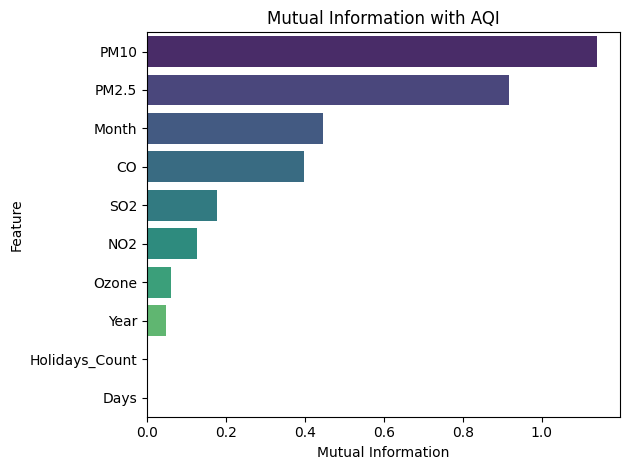

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=mi_df, x='Mutual Information', y='Feature', palette='viridis')
plt.title('Mutual Information with AQI')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Create 100 rows
n_rows = 100

# Real features
data = {
    'feature_1': np.random.normal(loc=10, scale=2, size=n_rows),  # Regular numeric feature
    'feature_2': np.random.uniform(5, 15, size=n_rows),            # Another real feature
}

# Constant feature (not zero)
data['constant_feature'] = 7

# Quasi-constant feature (mostly same value, not zero)
data['quasi_constant_feature'] = np.full(n_rows, 3)
data['quasi_constant_feature'][:3] = [2.9, 3.1, 3.05]  # introduce small variation in a few rows

# Target
data['target'] = np.random.randint(0, 2, size=n_rows)

# Create DataFrame
df_synthetic = pd.DataFrame(data)

# Check
print(df_synthetic.head())


   feature_1  feature_2  constant_feature  quasi_constant_feature  target
0  10.993428   9.174110                 7                       2       1
1   9.723471   7.221078                 7                       3       0
2  11.295377   6.198654                 7                       3       1
3  13.046060   8.376152                 7                       3       0
4   9.531693  14.429097                 7                       3       1


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mhassansaboor/uber-stocks-dataset-2025")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/uber-stocks-dataset-2025


In [ ]:
import pandas as pd
import os

print(os.listdir(path))
df = pd.read_csv(os.path.join(path, "uber_stock_data.csv"))
df.head()


['uber_stock_data.csv']


,Date,Adj Close,Close,High,Low,Open,Volume
0,2019-05-10,41.570000,41.570000,45.000000,41.060001,42.000000,186322500
1,2019-05-13,37.099998,37.099998,39.240002,36.080002,38.790001,79442400
2,2019-05-14,39.959999,39.959999,39.959999,36.849998,38.310001,46661100
3,2019-05-15,41.290001,41.290001,41.880001,38.950001,39.369999,36086100
4,2019-05-16,43.000000,43.000000,44.060001,41.250000,41.480000,38115500


In [ ]:
print(df.tail)

<bound method NDFrame.tail of             Date  Adj Close      Close       High        Low       Open  \
0     2019-05-10  41.570000  41.570000  45.000000  41.060001  42.000000   
1     2019-05-13  37.099998  37.099998  39.240002  36.080002  38.790001   
2     2019-05-14  39.959999  39.959999  39.959999  36.849998  38.310001   
3     2019-05-15  41.290001  41.290001  41.880001  38.950001  39.369999   
4     2019-05-16  43.000000  43.000000  44.060001  41.250000  41.480000   
...          ...        ...        ...        ...        ...        ...   
1439  2025-01-30  66.589996  66.589996  67.222000  63.419998  63.419998   
1440  2025-01-31  66.849998  66.849998  67.870003  66.333000  67.089996   
1441  2025-02-03  67.290001  67.290001  68.849998  65.178001  65.300003   
1442  2025-02-04  69.750000  69.750000  70.190002  67.690002  67.690002   
1443  2025-02-05  64.480003  64.480003  66.750000  63.500000  66.500000   

         Volume  
0     186322500  
1      79442400  
2      46661100

In [ ]:
print(df.describe())

         Adj Close        Close         High          Low         Open  \
count  1444.000000  1444.000000  1444.000000  1444.000000  1444.000000   
mean     44.465374    44.465374    45.287511    43.643301    44.493022   
std      15.594262    15.594262    15.740825    15.482652    15.643967   
min      14.820000    14.820000    17.799999    13.710000    15.960000   
25%      31.930000    31.930000    32.653749    31.181250    31.867499   
50%      41.355001    41.355001    41.910000    40.518499    41.215000   
75%      54.719999    54.719999    55.635001    53.597502    54.664999   
max      86.339996    86.339996    87.000000    84.180000    85.639999   

             Volume  
count  1.444000e+03  
mean   2.429800e+07  
std    1.774084e+07  
min    3.380000e+06  
25%    1.498905e+07  
50%    2.036965e+07  
75%    2.843280e+07  
max    3.642318e+08  


In [ ]:
print(df.isnull().sum())

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


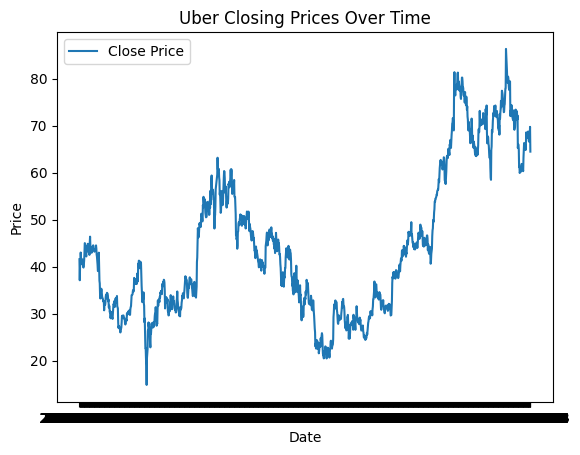

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df['Date'], df['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Uber Closing Prices Over Time')
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import pandas as pd
import os

print(os.listdir(path))
df = pd.read_csv(os.path.join(path, "uber_stock_data.csv"))
df.shape

['uber_stock_data.csv']


(1444, 7)

In [ ]:
[col for col in df.columns if df[col].isnull().sum() > 0]


[]

In [ ]:
from sklearn.model_selection import train_test_split
target = 'Close'
X = df.drop(columns=['Date', target])
y = df[target]
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Training samples: {x_train.shape[0]}")
print(f"Testing samples: {x_test.shape[0]}")


Training samples: 1155
Testing samples: 289


In [ ]:
# Identify constant features (std == 0)
constant_features = [
    feature for feature in x_train.columns if x_train[feature].std() == 0
]

print("Constant features:", constant_features)
print("Number of constant features:", len(constant_features))


Constant features: []
Number of constant features: 0
